In [ ]:
import os
import sys
import pandas as pd
import numpy as np 
import torch
import random

# Pytorch
Pytorch에서 입력 데이터, 출력 데이터, 그리고 학습 파라미터는 모두 `tensor`라는 데이터 구조로 되어있다.    
Tensor는 `np.ndarray`처럼 n차원 array이지만 추가적으로 텐서 그래프와 미분값을 가지고 있다. 또한 GPU이 가능하기 때문에 딥러닝 학습에 필수적으로 사용된다. 

[OFFICAL TORCH DOCUMENTS](https://pytorch.org/docs/stable/torch.html#torch)

# Table of Contents
1. [tensor 생성](#tensor-생성)
2. [tensor 정보](#tensor-정보-확인-및-변경)
3. [tensor 인덱싱](#tensor-인덱싱)
4. [tensor 연산](#tensor-연산)
5. [tensor 병합 및 분리 ](#tensor-병합-및-분리)

## tensor 생성

- 기존 list 또는 np.ndarray 를 tensor로 변환

In [ ]:
x = [[1],[2]]
print(f"x data type: {type(x)}")

x_tensor = torch.tensor(x)
print(f"x_tensor data type: {type(x_tensor)}")

x_np = np.array(x)
print(f"x_np data type: {type(x_np)}")

x_tensor = torch.from_numpy(x_np)
print(f"x_tensor data type: {type(x_tensor)}")


x data type: <class 'list'>
x_tensor data type: <class 'torch.Tensor'>
x_np data type: <class 'numpy.ndarray'>
x_tensor data type: <class 'torch.Tensor'>


- 특정 shape의 tensor 생성

In [ ]:
# shape -> tensor
shape = (2,3,)

zero_tensor = torch.zeros(shape)
print(f"zero tensor: {zero_tensor}, shape: {(zero_tensor.shape)}")

one_tensor = torch.ones(shape)
print(f"one tensor: {one_tensor}, shape: {(one_tensor.shape)}")

rand_tensor = torch.rand(shape) # [0,1) 범위의 균등 분포에서 임의의 값 추출
print(f"random tensor: {rand_tensor}, shape: {(rand_tensor.shape)}")

rand_dis_tensor = torch.randn(shape) # 정규분포에서 임의 값 추출
print(f"random distribution tensor: {rand_dis_tensor}, shape: {(rand_dis_tensor.shape)}")

rand_int_tensor = torch.randint(10, shape) # [low,high) 범위의 int 값을 임의 추출 
print(f"random int tensor: {rand_int_tensor}, shape: {(rand_int_tensor.shape)}")


zero tensor: tensor([[0., 0., 0.],
        [0., 0., 0.]]), shape: torch.Size([2, 3])
one tensor: tensor([[1., 1., 1.],
        [1., 1., 1.]]), shape: torch.Size([2, 3])
random tensor: tensor([[0.2090, 0.2398, 0.1843],
        [0.0885, 0.9465, 0.1521]]), shape: torch.Size([2, 3])
random distribution tensor: tensor([[-0.3754,  1.6840,  1.6758],
        [ 0.0786,  2.5419,  1.0606]]), shape: torch.Size([2, 3])
random int tensor: tensor([[2, 9, 3],
        [8, 2, 6]]), shape: torch.Size([2, 3])


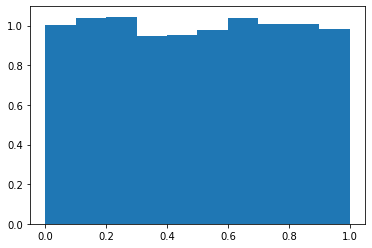

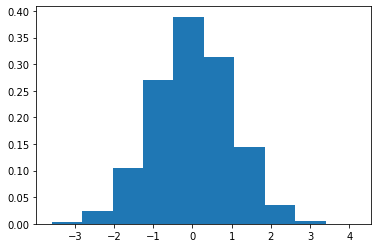

In [ ]:
# [참고]
import matplotlib.pyplot as plt
sample_size = 10000

uniform = np.random.rand(sample_size)
plt.hist(uniform, density=True)
plt.show()

normal = np.random.randn(sample_size)
plt.hist(normal, density=True)
plt.show()

- 1D tensor 생성

In [ ]:
one_dim_tensor = torch.arange(1,4,2) # start, end, step
print(f"일정한 간격의 1D tensor : {one_dim_tensor}")

one_dim_shaped_tensor = torch.arange(1*2*3)
print(f"{one_dim_shaped_tensor}")
print(f"Shaped : {one_dim_shaped_tensor.view(1,2,3)}")

일정한 간격의 1D tensor : tensor([1, 3])
tensor([0, 1, 2, 3, 4, 5])
Shaped : tensor([[[0, 1, 2],
         [3, 4, 5]]])


## tensor 정보 확인 및 변경
- rank
    - dimension 개수
- shape
    - 각 dimension의 value 개수 
- axis
    - 특정 dimension 지칭 

<img src="https://github.com/ChristinaROK/PreOnboarding_AI_assets/blob/36a670a7b6233d5218a495150beb337a899ecb70/week2/week2_1_tensor_axis.png?raw=true" alt="tensor_axis" width=500>


- data type
- device

[출처](https://medium.com/byte-sized-code/common-placeholders-in-numpy-arrays-1c3673718f2f)

In [ ]:
x = torch.rand(4,3,2)
print(f"Rank : {len(x.shape)}")
print(f"Shape : {x.shape}")

In [ ]:
# shape 변경
print(x.view(-1,2,2).shape)

xx = x.view(4,6,-1)
xx.shape

In [ ]:
# rank 변경
xxx = xx.squeeze()
print(xxx.shape)
print(xxx.unsqueeze(dim=-1).shape)

In [ ]:
print(f"Data Type: {x.dtype}")
print(f"Device: {x.device}")

## tensor 인덱싱
- tensor indexing으로 특정 행, 열의 값을 변경할 수 있음. 
    - broadcasting

In [ ]:
x = torch.rand(2,3)
print(f"Tensor : \n{x}")

print(f"1st row : {x[0]}")
print(f"1st column : {x[:,0]}")
print(f"last column : {x[:,-1]}")

x[:,-1] = 0 # broadcasting

print(f"last column : {x[:,-1]}")

Tensor : 
tensor([[0.9559, 0.9785, 0.1982],
        [0.3938, 0.6564, 0.6856]])
1st row : tensor([0.9559, 0.9785, 0.1982])
1st column : tensor([0.9559, 0.3938])
last column : tensor([0.1982, 0.6856])
last column : tensor([0., 0.])


In [ ]:
x

tensor([[0.9559, 0.9785, 0.0000],
        [0.3938, 0.6564, 0.0000]])

In [ ]:
x > 0.5

tensor([[ True,  True, False],
        [False,  True, False]])

In [ ]:
# masking
x * (x>0.5)

tensor([[0.9559, 0.9785, 0.0000],
        [0.0000, 0.6564, 0.0000]])

### [추가] 특정 index 얻기 

In [ ]:
print((x > 0.5).nonzero())
axis0, axis1 = (x > 0.5).nonzero(as_tuple=True)

tensor([[0, 0],
        [0, 1],
        [1, 1]])


In [ ]:
for i in range(len(axis0)):
    print(x[axis0[i]][axis1[i]])

tensor(0.9559)
tensor(0.9785)
tensor(0.6564)


## tensor 연산

In [ ]:
# 덧셈
x = torch.ones(3,2,4)
print(f"Type : {x.shape}")

print(x.sum(dim=0, keepdim=True).shape)
print(x.sum(dim=0, keepdim=False).shape) # size 1인 dimension을 squeeze
print(x.sum(dim=0, keepdim=True).squeeze().shape)

print(x.sum(dim=1, keepdim=True).shape)
print(x.sum(dim=2, keepdim=True).shape)

In [ ]:
# 곱셈
shape = (2,1) # (1,2)
x = torch.randint(10,shape)
y = torch.randint(10,shape)
print(f"x : {x} \ny : {y}")

print(torch.matmul(x,y.T))
print(x@y.T)

# [주의] matrix multiplication은 element-wise 곱과 다르다
print(torch.mul(x,y))
print(x*y)
print(x*y.T)

In [ ]:
# dot product -> 1d vector의 곱 연산의 합 -> output: scalar
shape = (2,)
x = torch.randint(10,shape)
y = torch.randint(10,shape)
print(f"x : {x} \ny : {y}")

print(torch.dot(x,y))
print(x@y)
print((x*y).sum())

## tensor 병합 및 분리

In [ ]:
# 병합
x = torch.randint(10,(1,2))
print(x)

x_concat = torch.cat([x,x,x], dim=1)
print(f"Concat : {x_concat} shape: {x_concat.shape}")

torch.cat([x,x,x], dim=0).shape

tensor([[6, 3]])
Concat : tensor([[6, 3, 6, 3, 6, 3]]) shape: torch.Size([1, 6])


torch.Size([3, 2])